# CSE2530 Computational Intelligence
## Assignment 1: Artificial Neural Networks

<div style="background-color:#f1be3e">

_Fill in your group number **from Brightspace**, names, and student numbers._
    
| Group                  | X       |
|------------------------|---------|
| Ignacio Cuñado Barral  | 5716128 |
| Daniel de Dios Allegue | 5722055 |
| Pablo Hendriks Bardaji | 5790069 |
| Alberto Moreno Sanchez | XXXXXXX |

#### Imports

In [57]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data

In [58]:
features = np.genfromtxt("data/features.txt", delimiter=",")
targets = np.genfromtxt("data/targets.txt", delimiter=",")
unknown = np.genfromtxt("data/unknown.txt", delimiter=",")

## 1 Questions
### 1.2 Architecture
#### Question 1:

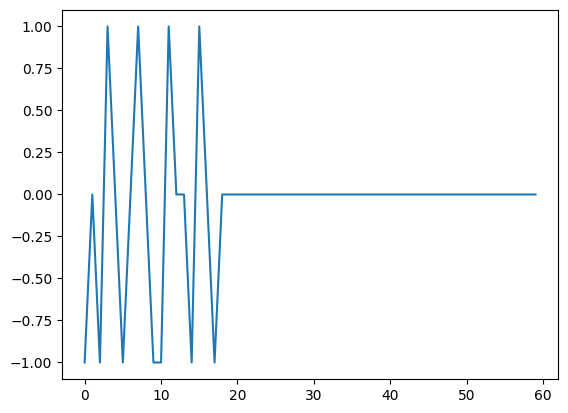

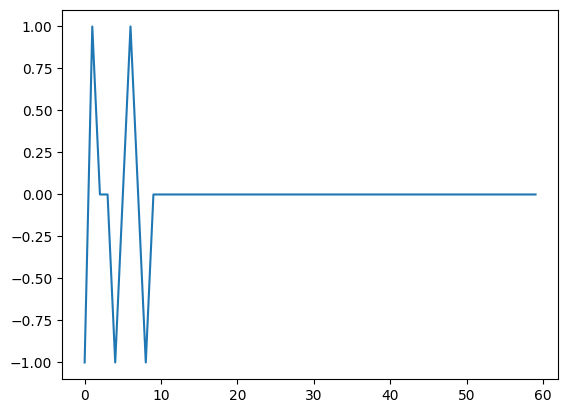

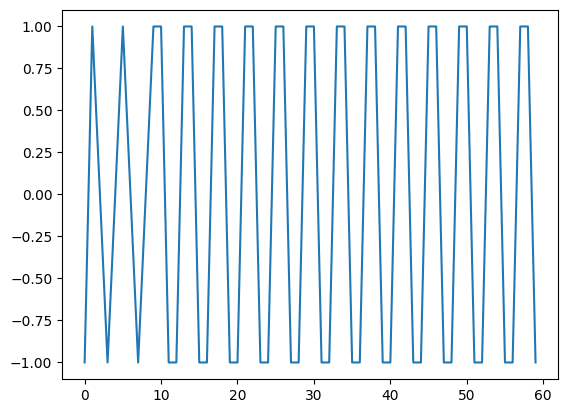

In [59]:
class SinglePerceptron:
    def __init__(self, size):
        # Intialize random weights and bias
        self.weights = np.random.rand(size)
        self.bias = np.random.rand(1)

    def forward(self, inputs):
        return np.dot(inputs, self.weights) + self.bias

    def activation(self, x):
        # ReLU
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        return self.activation(self.forward(inputs))

    def train(self, X, y, epochs, lr):
        error_per_epoch = []
        for _ in range(epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                error_per_epoch.append(error)
                self.weights += lr * error * X[i]
                self.bias += lr * error
        return error_per_epoch

# Train the perceptron of the logic gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

perceptron = SinglePerceptron(2)
errors_and = perceptron.train(X, y_and, 15, 1)
perceptron = SinglePerceptron(2)
errors_or = perceptron.train(X, y_or, 15, 1)
perceptron = SinglePerceptron(2)
errors_xor = perceptron.train(X, y_xor, 15, 1)

plt.plot(errors_and, label='AND')
plt.show()
plt.plot(errors_or, label='OR')
plt.show()
plt.plot(errors_xor, label='XOR')
plt.show()

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 2

<div style="background-color:#f1be3e">

We need 10 input neurons, each representing 1 feature of the input data

#### Question 3

<div style="background-color:#f1be3e">

Since there are 7 possible classes, we need 7 output neurons.

#### Question 4

<div style="background-color:#f1be3e">

Our initial guess is that we need two hidden layers. Data should not be too complex and it should not be too hard for the ANN to predict the classes. In case we are proven wrong later, and data is more complex than what we initially thought, we will need to increase the number of hidden layers and neurons. There are a few rules of thumb to calculate the number of neurons, but we believe between 10 and 7 neurons per hidden layer should be enough.

#### Question 5

<div style="background-color:#f1be3e">

Since this is multi-class classification problem, the output will be a 7-vector of probabilities. Hence, we need to output the class with the largest probability. We should use the softmax activation function for the output layer. For neurons in the hidden layers, other activation functions like ReLU are typically used.

#### Question 6

<div style="background-color:#f1be3e">

Please note our diagram contains bias units.
![ANN Diagram](resources/ANN_architecture.png)

### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [60]:
class Linear:
    def __init__(self, in_features, out_features, initialization):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """
               
        self.weight, self.bias = initialization(in_features, out_features)
        self.cache = None
        # For storing the gradients w.r.t. the weight and the bias
        self.weight_grad = None
        self.bias_grad = None

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input, so it can be used in the backward pass.

        Args:
            x: input of a linear layer.

        Returns: 
            y: output of a linear layer. 
        """
        self.cache = x
        return x @ self.weight + self.bias
    
    def backward(self, dupstream):
        """ Perform the backward pass of a linear layer.  

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
       
        self.weight_grad = self.cache.T @ dupstream
        self.bias_grad = np.sum(dupstream, axis=0, keepdims=True)
        return dupstream @ self.weight.T

In [61]:
def uniform_initialization(f_in, f_out):
    weight = np.random.rand(f_in, f_out)
    bias = np.random.rand(1, f_out)
    return weight, bias

def normal_initialization(f_in, f_out):
    weight = np.random.randn(f_in, f_out)
    bias = np.random.randn(1, f_out)
    return weight,bias

def exp_initialization(f_in, f_out):
    weight = np.random.exponential((f_in, f_out), 2)
    bias = np.random.exponential((1, f_out), 2)
    return weight,bias

def he_initialization(f_in, f_out):
    weight = np.random.randn(f_in, f_out) * np.sqrt(2 / f_in)
    bias = np.zeros((1, f_out))
    return weight, bias

def constant_initialization(f_in, f_out):
    constant = np.random.randint(1, 10)
    weight = np.full((f_in, f_out), constant)
    bias = np.full((1, f_out), constant) 
    return weight, bias

**Activation functions**

You alo need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [62]:
class ReLU:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output, so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """

        y = np.max(0, x)
        self.cache = y
        return y
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        
        return dupstream * (self.cache > 0)

In [ ]:
class SoftMax:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output, so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """
        
        exp = np.exp(x)
        softmax = exp / np.sum(exp)
        self.cache = softmax
        return softmax
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        softmax = self.cache
        return dupstream * softmax * (1 - softmax)

**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [63]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """
        
        y = x
        for layer in self.layers:
            y = layer.forward(y)
        return y
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        
        dx = dupstream
        for layer in reversed(self.layers):
            dx = layer.backward(dx)
        return dx
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        
        for layer in self.layers:
            layer.weight = layer.weight + lr * layer.weight_grad
            layer.bias = layer.bias + lr * layer.bias_grad

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [64]:
def loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """

    epsilon = 1e-15
    
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    loss = -np.sum(y_true * np.log(y_pred + epsilon))
    grad = -y_true / (y_pred + epsilon)

    return loss, grad

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [65]:
def train(net, inputs, labels, criterion, lr, epochs):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        criterion: loss function.
        lr: learning rate.
        epochs: number of epochs (training steps)

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every optimizer step. 
    """
    
    losses = []
    accuracies = []
    
    for _ in range(epochs):
        predictions = net.forward(inputs)
        loss, grad = criterion(labels, predictions)
        dx = net.backward(grad)
        net.optimizer_step(lr)
        
        losses.append(loss)
        accuracies.append(np.sum(predictions == labels) / len(predictions))
        
    return losses, accuracies

# TODO: fix

#### Question 7

In [66]:
combined_data = np.column_stack((features, targets))
np.random.shuffle(combined_data)
features = combined_data[:, :-1]
targets = combined_data[:, -1]

split_index = int(0.7 * features.shape[0])
X_train = features[:split_index]
# X_train = X_train.transpose()
X_test = features[split_index:]
X_test = X_test.transpose() # TODO: transpose?
y_train = targets[:split_index]
# y_train = y_train.transpose()
y_test = targets[split_index:]
y_test = y_test.transpose()

<div style="background-color:#f1be3e">

Since we want unbiased estimates and good performing predictions, we will make a 70/30 split. A 70/30 split provides a reasonable balance between sufficient train and test data, preventing overfitting whilst giving us enough detail about the performance of the model. We have decided to randomly shuffle the data to ensure reproducibility and to make sure the order does not affect performance. We are aware, however, that splitting data using a fixed ratio is not always the best answer possible as there does not exist a one-size-fits-all split, better approaches would include cross validation.

#### Question 8

In [67]:
def calc_accuracy(predictions, truth):
    assert(predictions.shape == truth.shape)
    return np.sum(predictions == truth) / len(truth)

<div style="background-color:#f1be3e">

We will use the accuracy metric to evaluate the performance of the network. This is because we are dealing with a classification problem and we want to know how many of the predictions were correct.

#### Question 9

<div style="background-color:#f1be3e">

We will stop training after a certain number of iterations (epochs), or after the error stops decreasing or the error is below a certain threshold. We have inserted an epoch parameter in the ```train``` function above in order to easily change the amount of training steps. The number of epochs along with the learning rate will be tweaked in the optimisation part of the assignment. Too many epochs can result to overfitting and long training times, whilst too few epochs

#### Question 10

In [ ]:
activation = Activation()
epochs = 25

initialization_functions = [(normal_initialization, 'Normal Distribution'), (exp_initialization, 'Exponential Distribution'), (uniform_initialization, 'Uniform Distribution'), (constant_initialization, 'Constant'), (he_initialization, 'He')]

for function, name in initialization_functions:
    loss_arr, accuracy_arr = [], []
    
    for _ in range(2):
        layers = [Linear(10, 8, function), Linear(8, 8, function), Linear(8, 8, function), Linear(8, 7, function)]
        network = Network(layers)
        losses, accuracies = train(network, X_train, y_train, loss, 0.1, epochs)
        loss_arr.append(losses)
        accuracy_arr.append(accuracies)
        
    calculated_loss = np.mean(loss_arr, axis=1)
    calculated_accuracy = np.mean(accuracy_arr, axis=1)

    plt.plot(calculated_loss, label='Loss')
    plt.plot(calculated_accuracy, label='Accuracy')
    plt.title(name + " Initialization")
    plt.show()
    
# TODO: Analyse results

<div style="background-color:#f1be3e">

We have created a few initialization functions which can be passed into the ```Linear``` class constructor to modify how weight and bias parameters are initialized.

### 1.4 Optimization

#### Question 11

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 12

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 1.5 Evaluation

#### Question 13

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 14

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 15

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 1.6 Scikit-learn

#### Question 16

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

#### Question 17

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

### 1.7 Reflection

#### Question 18

<div style="background-color:#f1be3e">

_Write your answer here._

#### Question 19

<div style="background-color:#f1be3e">

_Write your answer here._

### 1.8 Pen and paper

#### Question 20

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

#### Question 21

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">


|          Component          |  Name A   |  Name B   |  Name C   |  Name D   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     A     |     B     |     C     |     D     |
| Code (implementation)       |     A     |     B     |     C     |     D     |
| Code (validation)           |     A     |     B     |     C     |     D     |
| Experiments (execution)     |     A     |     B     |     C     |     D     |
| Experiments (analysis)      |     A     |     B     |     C     |     D     |
| Experiments (visualization) |     A     |     B     |     C     |     D     |
| Report (original draft)     |     A     |     B     |     C     |     D     |
| Report (reviewing, editing) |     A     |     B     |     C     |     D     |

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**